In [8]:
import numpy as np
import pandas as pd

In [184]:
games=pd.read_csv("CFB2016_scores.csv",header=None,names=["a_ind","a_score","b_ind","b_score"])
teams=pd.read_csv("TeamNames.txt",header=None,names=["team"])
index=pd.Series(range(1,len(teams)+1))
teams['ind']=index

In [183]:
np.min(games.a_ind)

1

In [200]:
M=np.zeros((len(teams),len(teams)),dtype=float)
for i in range(len(games)):
    if games.a_score[i]>games.b_score[i]:
        a_wins=1
        b_wins=0
    else:
        b_wins=1
        a_wins=0
    a_prop=(games.a_score[i]+0.0)/(games.a_score[i]+games.b_score[i]+0.0)
    b_prop=(games.b_score[i]+0.0)/(games.a_score[i]+games.b_score[i]+0.0)

    M[games.a_ind[i]-1][games.a_ind[i]-1]=M[games.a_ind[i]-1][games.a_ind[i]-1]+a_wins+a_prop
    M[games.b_ind[i]-1][games.b_ind[i]-1]=M[games.b_ind[i]-1][games.b_ind[i]-1]+b_wins+b_prop
    
    M[games.a_ind[i]-1][games.b_ind[i]-1]=M[games.a_ind[i]-1][games.b_ind[i]-1]+b_wins+b_prop
    M[games.b_ind[i]-1][games.a_ind[i]-1]=M[games.b_ind[i]-1][games.a_ind[i]-1]+a_wins+a_prop
    
sums=M.sum(axis=1)
for i in range(len(M)):
    M[i]=M[i]/sums[i]

In [206]:
w[0][np.argsort(w)[0][len(w[0])-25:len(w[0])]]

array([ 0.00952351,  0.01052444,  0.01053654,  0.01054168,  0.01105016,
        0.01197299,  0.01197327,  0.01245617,  0.01248801,  0.01261239,
        0.01283024,  0.01375278,  0.0139769 ,  0.01448896,  0.01514424,
        0.01592243,  0.01623476,  0.01634207,  0.01642561,  0.01752392,
        0.0175791 ,  0.01992155,  0.02083524,  0.06698283,  0.06728211])

In [211]:
iters=10000
w=np.ones((1,len(teams)),dtype=float)/len(teams)
for i in range(iters):
    w=np.dot(w,M)
    top25=np.transpose(np.argsort(w)[0][len(w[0])-25:len(w[0])])
    top25_ord=top25.copy()
    top25_ind=top25.copy()

    for i in range(len(top25)):
        top25_ord[i]=top25[len(top25)-i-1]+1
        top25_ind[i]=top25[len(top25)-i-1]
    top25_ser=pd.DataFrame(top25_ord,columns=['ind'])    
    top25_ser['value']=pd.Series(w[0][top25_ind])
#top25_ser.head()
top25_ser.merge(teams, how='left', left_on='ind', right_on='ind')

,ind,value,team
0,6,0.067282,Alabama
1,134,0.066983,Clemson
2,220,0.020835,Florida St
3,490,0.019922,Ohio State
4,705,0.017579,Washington
5,691,0.017524,Virginia Tech
6,390,0.016426,Michigan
7,441,0.016342,NW Missouri St
8,512,0.016235,Pittsburgh
9,493,0.015922,Oklahoma


In [212]:
w_oth,v=np.linalg.eig(np.transpose(M))
w_oth

array([ 0.04099884+0.j        ,  0.04761823+0.j        ,
        0.05513509+0.j        ,  0.06684960+0.j        ,
        0.06642787+0.j        ,  0.07418494+0.j        ,
        0.07830966+0.j        ,  0.08903168+0.j        ,
        0.07894203+0.j        ,  0.99822719+0.j        ,
        0.99710528+0.j        ,  1.00000000+0.j        ,
        1.00000000+0.j        ,  0.98673332+0.j        ,
        0.98362148+0.j        ,  0.98152051+0.j        ,
        0.98103918+0.j        ,  0.97339630+0.j        ,
        0.96999498+0.j        ,  0.96203992+0.00211511j,
        0.96203992-0.00211511j,  0.95663924+0.j        ,
        0.95354676+0.j        ,  0.95221241+0.j        ,
        0.95056657+0.j        ,  0.94916182+0.j        ,
        0.94399030+0.j        ,  0.94353126+0.j        ,
        0.94043704+0.j        ,  0.93910172+0.00074838j,
        0.93910172-0.00074838j,  0.91937294+0.0244278j ,
        0.91937294-0.0244278j ,  0.93169106+0.j        ,
        0.92464105+0.j        ,

In [213]:
eig=np.real(v[:,11])
sums=eig.sum()
w_eig=w.copy()
for i in range(len(eig)):
    w_eig[0][i]=eig[i]/sums

iters=10000
w=np.ones((1,len(teams)),dtype=float)/len(teams)
dist=[]
for i in range(iters):
    w=np.dot(w,M)
    dist.append(np.absolute(w-w_eig).sum()/len(w))

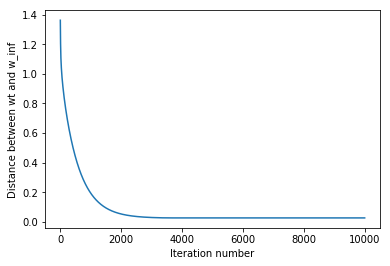

In [214]:
import matplotlib.pyplot as plt
plt.plot(dist)
plt.ylabel('Distance between wt and w_inf')
plt.xlabel('Iteration number')
with open(...) as f:
    for line in f:
plt.show()

In [135]:
i=0
X=np.zeros((3012,8447),dtype=float)
with open("nyt_data.txt") as f:
    for line in f:
        curr=line.strip()
        pairs=curr.split(',')
        for pair in pairs:
            mapping=pair.split(':')
            X[int(mapping[0])-1][i]=int(mapping[1])
        i=i+1
print X

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 2.  0.  0. ...,  0.  0.  2.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [79]:
#Problem 2
print H[0]

[ 0.  0.  0. ...,  0.  0.  0.]


In [140]:
iters=100
W=np.random.uniform(low=1.0, high=2.0, size=(3012,25))
H=np.random.uniform(low=1.0, high=2.0, size=(25,8447))
L=[]
for o in range(20):
    if o==0:
        prod=np.dot(W,H)
        prod[np.where(prod==0)]=1e-16

    #print H[0]
    for k in range(len(H)):
        Wik=np.transpose(np.asmatrix(W[:,k]))
        multi=np.multiply(Wik,X)
        num=np.divide(multi,prod)
        div_sums=Wik.sum()
        H[k]=np.multiply(H[k],np.divide(num,div_sums)[0])
    
    prod=np.dot(W,H)
    prod[np.where(prod==0)]=1e-16
    
    for i in range(len(W)):
        Xij=np.asmatrix(X[i,:])
        multi=np.multiply(H,Xij)
        num=np.divide(multi,prod[i,:])
        num_sum=num.sum(axis=1)
        div_sums=np.transpose(np.asmatrix(H.sum(axis=1)))
        
        #print multi.shape
        #print num_sum.shape
        #print div_sums.shape
        #print np.asmatrix(W[i]).shape
        W[i]=np.transpose(np.multiply(np.transpose(np.asmatrix(W[i])),np.divide(num_sum,div_sums)))[0]
        
    #loss
    prod=np.dot(W,H)
    prod[np.where(prod==0)]=1e-16
    #print np.where(prod==0)
    prod_log=-1*np.log(prod)
    loss=(np.multiply(X,prod_log)+prod).sum()
    print loss
    L.append(loss)
#print W[0]    

32992771.7396
32992640.3217


KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import normalize
obj = np.zeros(100)
Losses=[]
W=np.random.uniform(low=1.0, high=2.0, size=(3012,25))
H=np.random.uniform(low=1.0, high=2.0, size=(25,8447))

for t in range(100):
    print t
    prod = np.dot(W,H)
    prod[prod==0] = 1e-16
    mat1 = X/prod
    mat2 = W.T.copy()
    for i in range(len(mat2)):
        mat2[i] = normalize(mat2[i][:,np.newaxis],axis=0,norm='l1').ravel()
    H = H *np.dot(mat2,mat1)
    
    prod = np.dot(W,H)
    prod[prod==0] = 1e-16
    mat1 = X/prod
    
    mat3 = H.T.copy()
    for j in range(mat3.shape[1]):
        mat3[:,j] = normalize(mat3[:,j][:,np.newaxis],axis=0,norm='l1').ravel()
    W = W * np.dot(mat1,mat3)
    prod = np.dot(W,H)
    prod[prod==0] = 1e-16
    loss=np.sum(X*-np.log(prod)+prod)
    Losses.append(loss)
    print loss

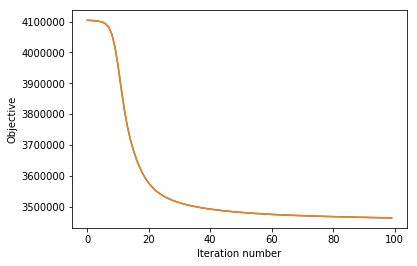

In [150]:
import matplotlib.pyplot as plt

plt.plot(range(100),Losses)
plt.xlabel("Iteration number")
plt.ylabel("Objective")
plt.show()

In [151]:
Wcopy = W.copy()
for j in range(Wcopy.shape[1]):
    Wcopy[:,j] = normalize(Wcopy[:,j][:,np.newaxis],axis=0,norm='l1').ravel()
W = Wcopy
Wdf = pd.DataFrame(Wcopy)
Wdf['index'] = Wdf.index
Wdf.sort_values(1,ascending=False)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,index
35,2.737005e-26,2.606584e-02,8.904539e-30,5.278125e-03,4.584925e-14,1.505874e-24,1.930394e-18,2.234909e-39,8.555875e-35,4.839443e-08,...,2.813129e-03,7.474398e-03,8.648543e-29,8.916013e-21,7.705269e-25,2.555143e-03,1.488754e-02,8.764943e-23,6.586043e-22,35
291,1.376432e-18,1.799653e-02,1.220693e-11,1.256012e-04,1.348913e-19,3.013931e-44,3.398201e-25,2.166418e-41,1.289046e-25,1.417028e-16,...,1.268949e-03,7.418426e-38,8.925653e-28,3.246122e-14,8.426252e-15,6.280964e-04,4.012974e-25,3.159260e-15,1.079355e-20,291
4,1.063152e-10,1.663469e-02,4.990748e-22,3.934975e-04,9.706511e-04,1.120879e-02,2.022147e-09,4.989937e-21,1.289423e-32,5.998105e-03,...,7.910085e-09,4.607109e-03,1.193608e-19,2.891304e-12,9.757810e-16,3.434598e-08,2.486137e-29,1.713662e-03,1.194922e-05,4
232,2.099330e-19,1.290828e-02,4.687833e-06,9.087432e-04,1.615729e-03,1.565354e-03,1.194955e-03,2.047063e-11,2.456303e-04,6.472306e-16,...,5.360386e-03,5.957120e-05,1.437905e-10,1.209989e-05,3.980054e-09,2.363000e-16,4.749246e-03,2.246099e-07,2.623065e-08,232
66,7.976052e-04,1.175531e-02,6.393365e-03,2.118768e-03,2.563883e-03,1.363295e-12,2.356137e-04,6.471086e-13,2.912675e-06,2.176023e-09,...,1.202913e-04,1.339643e-08,1.396505e-10,2.614092e-08,2.513268e-03,6.190137e-04,2.179153e-14,2.223710e-03,1.676098e-04,66
346,1.934785e-12,1.096859e-02,1.485490e-27,1.271329e-04,4.913155e-04,1.510028e-03,4.470649e-16,3.318852e-37,4.679879e-46,1.303934e-03,...,1.228818e-03,2.487585e-03,1.038748e-33,1.260530e-04,7.925845e-24,1.309773e-46,8.875966e-26,2.853455e-17,4.236023e-09,346
378,6.665344e-32,1.046077e-02,1.148268e-18,1.528038e-14,2.730693e-25,2.598018e-24,5.265564e-21,1.832837e-24,1.230124e-28,3.645487e-09,...,3.521367e-03,7.658347e-15,2.485441e-25,1.356332e-10,4.104924e-21,1.532484e-67,9.234102e-32,8.465466e-19,3.109682e-16,378
278,1.586945e-42,9.551277e-03,3.466672e-29,2.139798e-04,8.674169e-04,2.952006e-06,2.089236e-05,1.067228e-28,9.608846e-19,1.094809e-30,...,2.474851e-14,6.673720e-23,1.277496e-13,1.732398e-36,2.015199e-21,1.264111e-55,1.380910e-33,3.504010e-05,5.801344e-27,278
145,7.534492e-20,9.351818e-03,7.145300e-07,1.802116e-03,1.825503e-03,1.804643e-03,1.082263e-03,9.805279e-17,2.839892e-07,2.068717e-03,...,2.178277e-03,1.504049e-03,3.107567e-03,4.135730e-03,1.463407e-03,1.144507e-04,2.970272e-16,1.275683e-11,9.547262e-19,145
33,3.734612e-18,8.735751e-03,5.051655e-16,1.297822e-03,6.228927e-03,1.102083e-03,1.279742e-06,3.472033e-16,2.732382e-21,3.881122e-11,...,7.149228e-03,3.070319e-19,1.678153e-07,3.647264e-03,1.217244e-05,1.340779e-17,3.634943e-02,2.204777e-03,1.180408e-03,33


In [152]:
nyt_dat = np.loadtxt("nyt_vocab.dat",dtype=str)
nyt_dat[(Wdf.sort_values(1,ascending=False))['index'][:10]]
weightlist = {}
wordlist = {}
for i in range(25):
    wordlist[i] = nyt_dat[(Wdf.sort_values(i,ascending=False))['index'][:10]]
    weightlist[i] = (Wdf.sort_values(i,ascending=False))[i][:10]

In [193]:
i=24
#for i in range(25):
pd.DataFrame({'words':wordlist[i],'weights':weightlist[z]})

,weights,words
138,0.023512,test
3,0.014590,study
275,0.013931,problem
376,0.009956,research
473,0.009921,result
594,0.009810,expert
515,0.009305,system
445,0.008568,change
920,0.007889,develop
305,0.007720,number
